# Titanic Survivability Analisys

Can we get an insigth of what factors determined if a passenger survived?

## TO DO
+ add column descriptions

In [1]:
# load pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10
%matplotlib inline

In [2]:
# load the data
df = pd.read_csv('titanic.csv')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Cleaning the data

Thats the first thing we must do with a new dataset. 
For ewe can start looking at the data types of each column with:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


here we can see that `age` is a `float64`. It would make more sense if it was an `int64` isn't it?? it's a little bit picky to say that you have 28.764 years.

In [4]:
sum(df.age.isna())

263

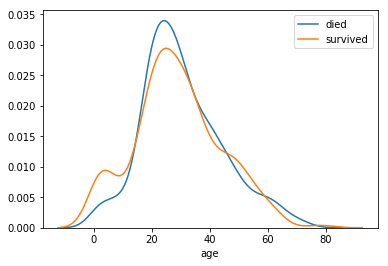

In [5]:
plt.figure()
sns.distplot(df[df.survived == 0]['age'].dropna(),hist=False, label='died')
sns.distplot(df[df.survived == 1]['age'].dropna(),hist=False, label='survived')
plt.show()

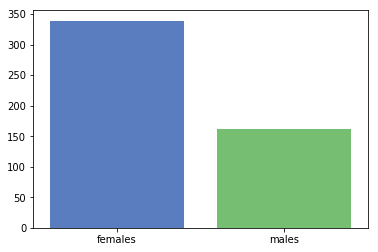

In [6]:
fem_survs = len(df.query('sex == "female" and survived == 1'))
male_surv = len(df.query('sex == "male" and survived == 1'))
sns.barplot(['females', 'males'], [fem_survs, male_surv], palette='muted')

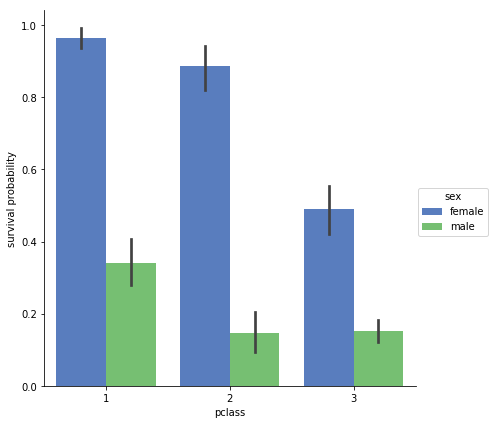

In [7]:
g = sns.factorplot(x="pclass", y="survived", hue="sex", data=df,
                   size=6, kind="bar", palette="muted")
g.set_ylabels("survival probability")